N=100, Estimated Pi=3.32
N=1000, Estimated Pi=3.124
N=10000, Estimated Pi=3.1504
N=100000, Estimated Pi=3.13772
N=1000000, Estimated Pi=3.139696
N=10000000, Estimated Pi=3.1424044
N=100000000, Estimated Pi=3.14132032


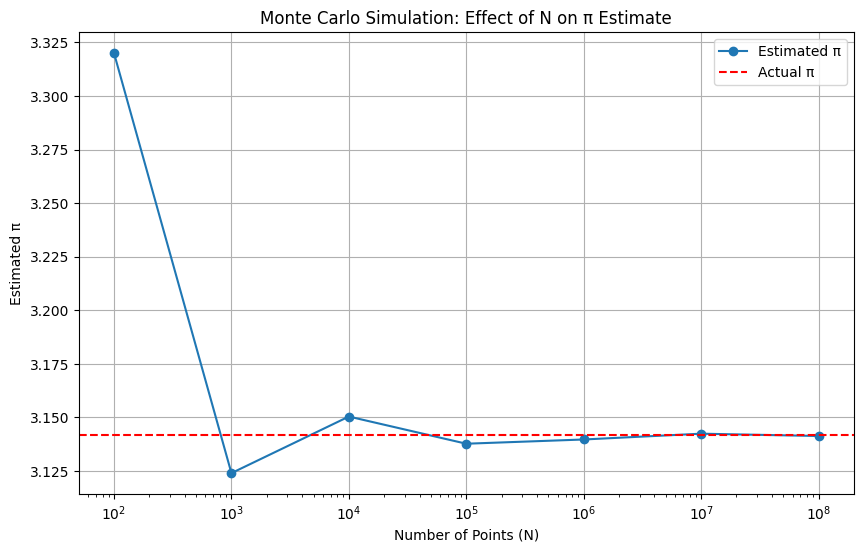

In [9]:
import random
import matplotlib.pyplot as plt

def monte_carlo_pi(N):
    inside_circle = 0 

    for _ in range(N):
        # Generate random x, y between -1 and 1
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        
        # Check if the point lies inside the circle
        if x**2 + y**2 <= 1:
            inside_circle += 1  
            
    pi_estimate = 4 * (inside_circle / N)
    return pi_estimate

# Different values of N
N_values = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
pi_estimates = []

for N in N_values:
    pi = monte_carlo_pi(N)
    pi_estimates.append(pi)
    print(f"N={N}, Estimated Pi={pi}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_values, pi_estimates, marker='o', label="Estimated π")
plt.axhline(y=3.14159, color='r', linestyle='--', label="Actual π")
plt.xscale('log') 
plt.xlabel("Number of Points (N)")
plt.ylabel("Estimated π")
plt.title("Monte Carlo Simulation: Effect of N on π Estimate")
plt.legend()
plt.grid(True)
plt.show()


Chi-Square Goodness-of-Fit Test Results:
Observed Frequencies: [2 1 3 3 1 0 3 1 3 3]
Expected Frequencies: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Chi-Square Statistic: 6.0
P-value: 0.7399182920946538
Conclusion: Fail to reject the null hypothesis. The data is uniformly distributed.


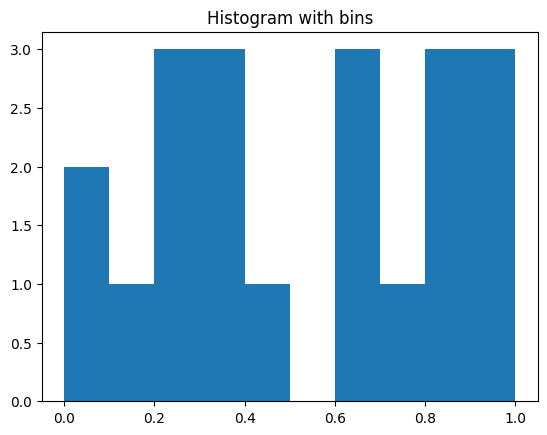


Kolmogorov-Smirnov Goodness-of-Fit Test Results:
KS Statistic: 0.14
P-value: 0.7779803346700258
Conclusion: Fail to reject the null hypothesis. The data follows a uniform distribution.


In [10]:
import numpy as np
from scipy.stats import chisquare, ks_1samp
from scipy.stats import uniform

# Given
numbers = [0.21, 0.88, 0.37, 0.06, 0.98, 0.61, 0.89, 0.28, 0.70, 0.94, 
           0.46, 0.92, 0.34, 0.08, 0.79, 0.82, 0.36, 0.62, 0.27, 0.10]

# Compute 10 subintervals
bins = np.linspace(0, 1, 11)
observed, bin_edges = np.histogram(numbers, bins=bins)  

# Expected frequency
total_numbers = len(numbers) 
expected = [total_numbers / 10] * 10  # Equal probability for each bin in a uniform distribution

# Chi-square Goodness-of-Fit Test
chi2_stat, p_value_chi2 = chisquare(f_obs=observed, f_exp=expected)

print("Chi-Square Goodness-of-Fit Test Results:")
print(f"Observed Frequencies: {observed}")
print(f"Expected Frequencies: {expected}")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value_chi2}")

if p_value_chi2 < 0.05:
    print("Conclusion: Reject the null hypothesis. The data is not uniformly distributed.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The data is uniformly distributed.")
    
plt.hist(numbers, bins=bins) 
plt.title("Histogram with bins")
plt.show()

ks_stat, p_value_ks = ks_1samp(numbers, cdf=uniform.cdf, args=(0, 1))  # Uniform distribution [0, 1]

print("\nKolmogorov-Smirnov Goodness-of-Fit Test Results:")
print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value_ks}")

if p_value_ks < 0.05:
    print("Conclusion: Reject the null hypothesis. The data does not follow a uniform distribution.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The data follows a uniform distribution.")


In [11]:
import numpy as np
from scipy.stats import chi2

# Given
this_semester = np.array([20, 22, 13, 2, 2])
last_semester = np.array([10, 19, 25, 4, 1])

# Combine totals
total_this_semester = np.sum(this_semester)
total_last_semester = np.sum(last_semester)
overall_total = this_semester + last_semester

# Expected frequencies
expected_this_semester = (overall_total / overall_total.sum()) * total_this_semester
expected_last_semester = (overall_total / overall_total.sum()) * total_last_semester

# Calculate Chi-Square statistic
chi2_stat_this = np.sum((this_semester - expected_this_semester)**2 / expected_this_semester)
chi2_stat_last = np.sum((last_semester - expected_last_semester)**2 / expected_last_semester)

# Total Chi-Square statistic (combining contributions from both semesters)
chi2_stat_total = chi2_stat_this + chi2_stat_last

# Degrees of freedom and critical value
df = len(this_semester) - 1 
critical_value = chi2.ppf(0.95, df)

# P-value
p_value = 1 - chi2.cdf(chi2_stat_total, df)

# Output
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat_total}")
print(f"Degrees of Freedom: {df}")
print(f"Critical Value (α=0.05): {critical_value}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. The grade distributions are statistically different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The grade distributions are not statistically different.")


Chi-Square Test Results:
Chi-Square Statistic: 8.342319212665812
Degrees of Freedom: 4
Critical Value (α=0.05): 9.487729036781154
P-value: 0.07981349745937583
Conclusion: Fail to reject the null hypothesis. The grade distributions are not statistically different.
